In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



*Johann Bernoulli recognizes Newton "as the lion by its claw.”* [<sup id="fn1-back">1</sup>](#fn1). 

# Nonlinear Least Squares

Consider the datasets `dataset-2`, `dataset-3` and `dataset-5`. On careful observation of the plots of these dataset, they appear rather familiar: indeed, the first of these is reminiscent of a sinusoidal wave; the second reminiscent of a gaussian distribution. Finally, the third dataset is reminiscent of a many distributions, such as a log-normal, a gamma, a beta, etc.


## Goal
In this data science notebook, we will learn a crucial technique called nonlinear least squares. With this technique in hand, we will revisit the aforementioned datasets.

## Load and explore the data
Let us perform the usual steps of exploratory data analysis.

load the data, and check for missing values if any. (If you recall, we did not have any missing values in the data, and we simply verify it here.
seperate out the predictor from the response
split the data into the train and test set
visualize the data as a scatter plot

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/supportvectors/ml-100/master/dataset-2.csv")
data.describe()

,x,y
count,99.000000,99.000000
mean,3.148976,-0.028816
std,1.880196,1.002099
min,0.038072,-1.529792
25%,1.457762,-1.058620
50%,3.081753,0.014350
75%,4.777492,0.901731
max,6.246581,1.561481


In [3]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [4]:
X, y = data[['x']], data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, )

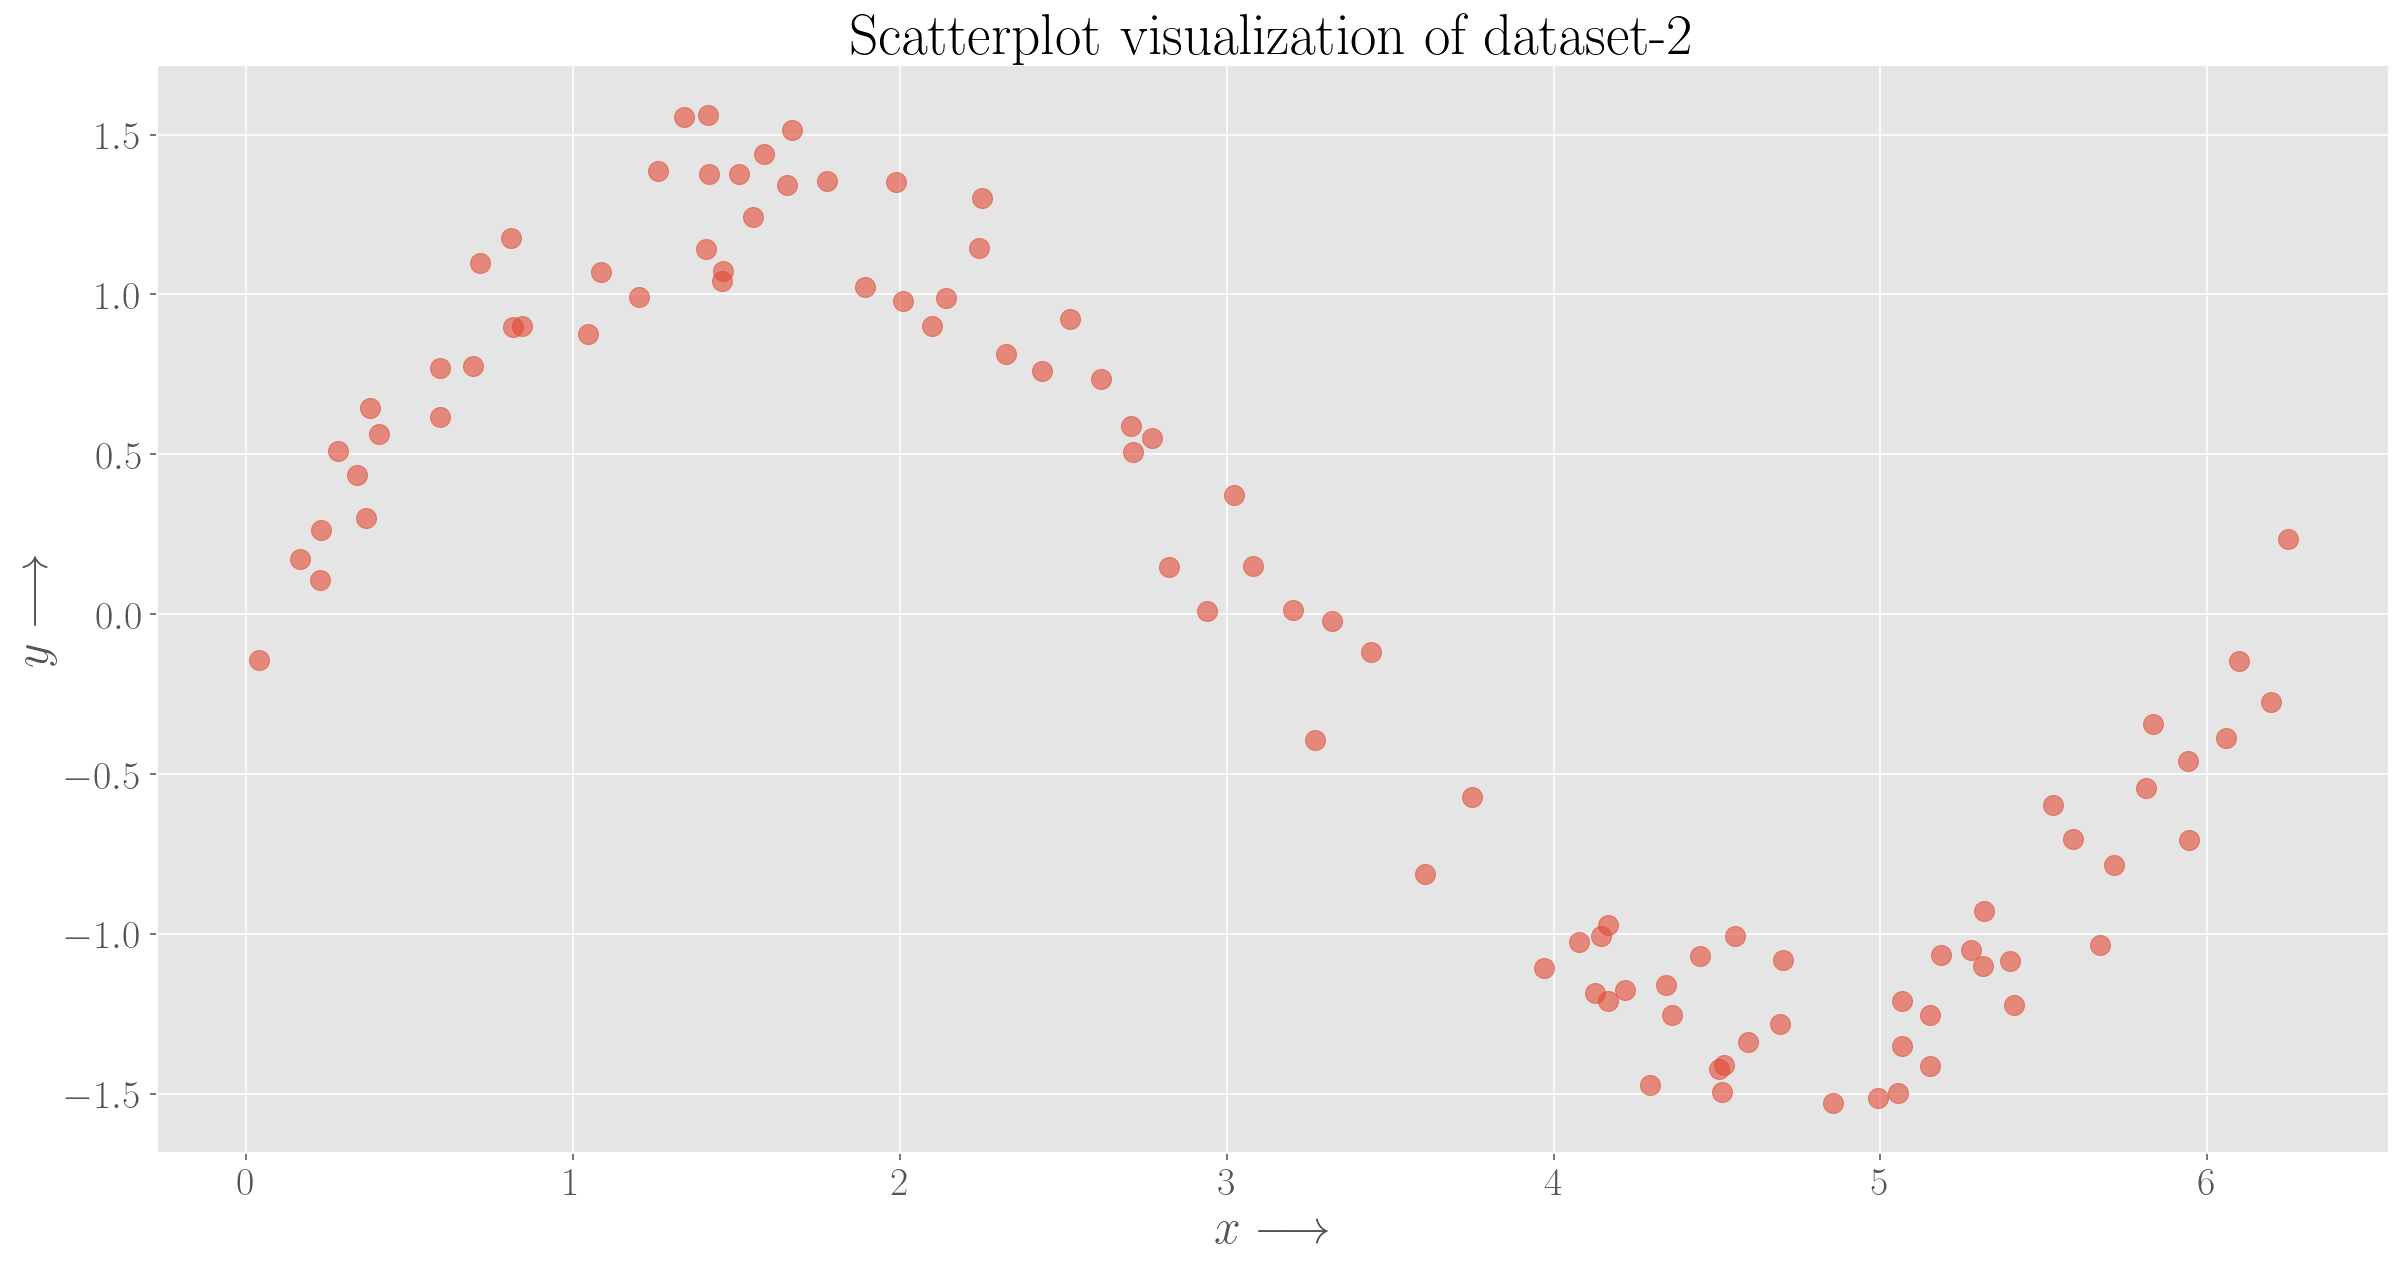

In [5]:
plt.scatter(data['x'], data['y'], s=100, alpha=0.6);
plt.xlabel(r'$x\longrightarrow$')
plt.ylabel(r'$y\longrightarrow$')
plt.title(r'Scatterplot visualization of dataset-2 ');

# Nonlinear Least-Squares

The figure above is strongly reminiscent of a sinusoidal curve. Therefore, we will try to directly fit a parameteric model relying on a sine-wave hypothesis:
    $$\begin{aligned} 
    y &= A \sin(kx + \phi)\\
    \text{where}&: \\
    A &: \text{amplitude of the sine-wave}\\
    k &: \text{wave number}\\
    \phi &: \text{phase shift}
    \end{aligned}$$
    
 Therefore, we can consider that $A, k \text{ and } \phi $ are the parameters of the model.
 
 Let us now try to fit a data to the model, and find the optimal parameter values, as follows:

In [19]:
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t

def sinewave(x, A, k, ϕ):
    'nonlinear function in A, k, phi to fit to data'
    return A * np.sin (k*x + ϕ)

initial_guess = [1, 1, 1]
pars, pcov = curve_fit(sinewave, data.x, data.y, p0=initial_guess)

# Print the results:
np.set_printoptions(precision=5, suppress=True)
print(" {:<5}= {}\n {:<5}= {}\n {:<5}= {}\n\n"
       .format('A', pars[0], 'k', pars[1], 'ϕ', pars[2]))
print("The estimated parameter covariance matrix: \n{}".format (pcov))

 A    = 1.4508030425781275
 k    = 0.22538507549942713
 ϕ    = 1.0479270008215447


The estimated parameter covariance matrix: 
[[ 0.00002  0.       0.     ]
 [ 0.       0.      -0.00001]
 [ 0.      -0.00001  0.00011]]


Let us also compute the 95% confidence interval for each of the parameters of the model.

In [7]:
α = 0.05 # 95% confidence interval = 100*(1-α)

n = len(y)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-α/2., dof) 


for par, i, p,var in zip(['A', 'k', 'phi'], range(n), pars, np.diag(pcov)):
    σ = var**0.5
    print ('{:<5}: Estimated: {:0.4f}, \
           Confidence Interval: [{:0.4f}  {:0.4f}]'
           .format(par, p,
                   p - σ*tval,
                   p + σ*tval))



A    : Estimated: 1.3257,            Confidence Interval: [1.2782  1.3732]
k    : Estimated: 1.0031,            Confidence Interval: [0.9841  1.0222]
phi  : Estimated: -0.0201,            Confidence Interval: [-0.0898  0.0496]


We do not have a clear notion of $R^2$ in the nonlinear least squares method: therefore, it is much more customary to look art the Pearson correlation $\rho$ between target prediction $\hat y$ and the actual target values $y$.

In [8]:
ŷ = sinewave(X.x, pars[0], pars[1], pars[2])
ρ = np.corrcoef(y, ŷ)
print ("The corr-matrix between y and yhat is: \n{}".format(ρ))
print ("Thus the correlation is: {:<0.3f}".format(100*ρ[1,0]))


The corr-matrix between y and yhat is: 
[[1.      0.98586]
 [0.98586 1.     ]]
Thus the correlation is: 98.586


Let us also visualize this relationship.

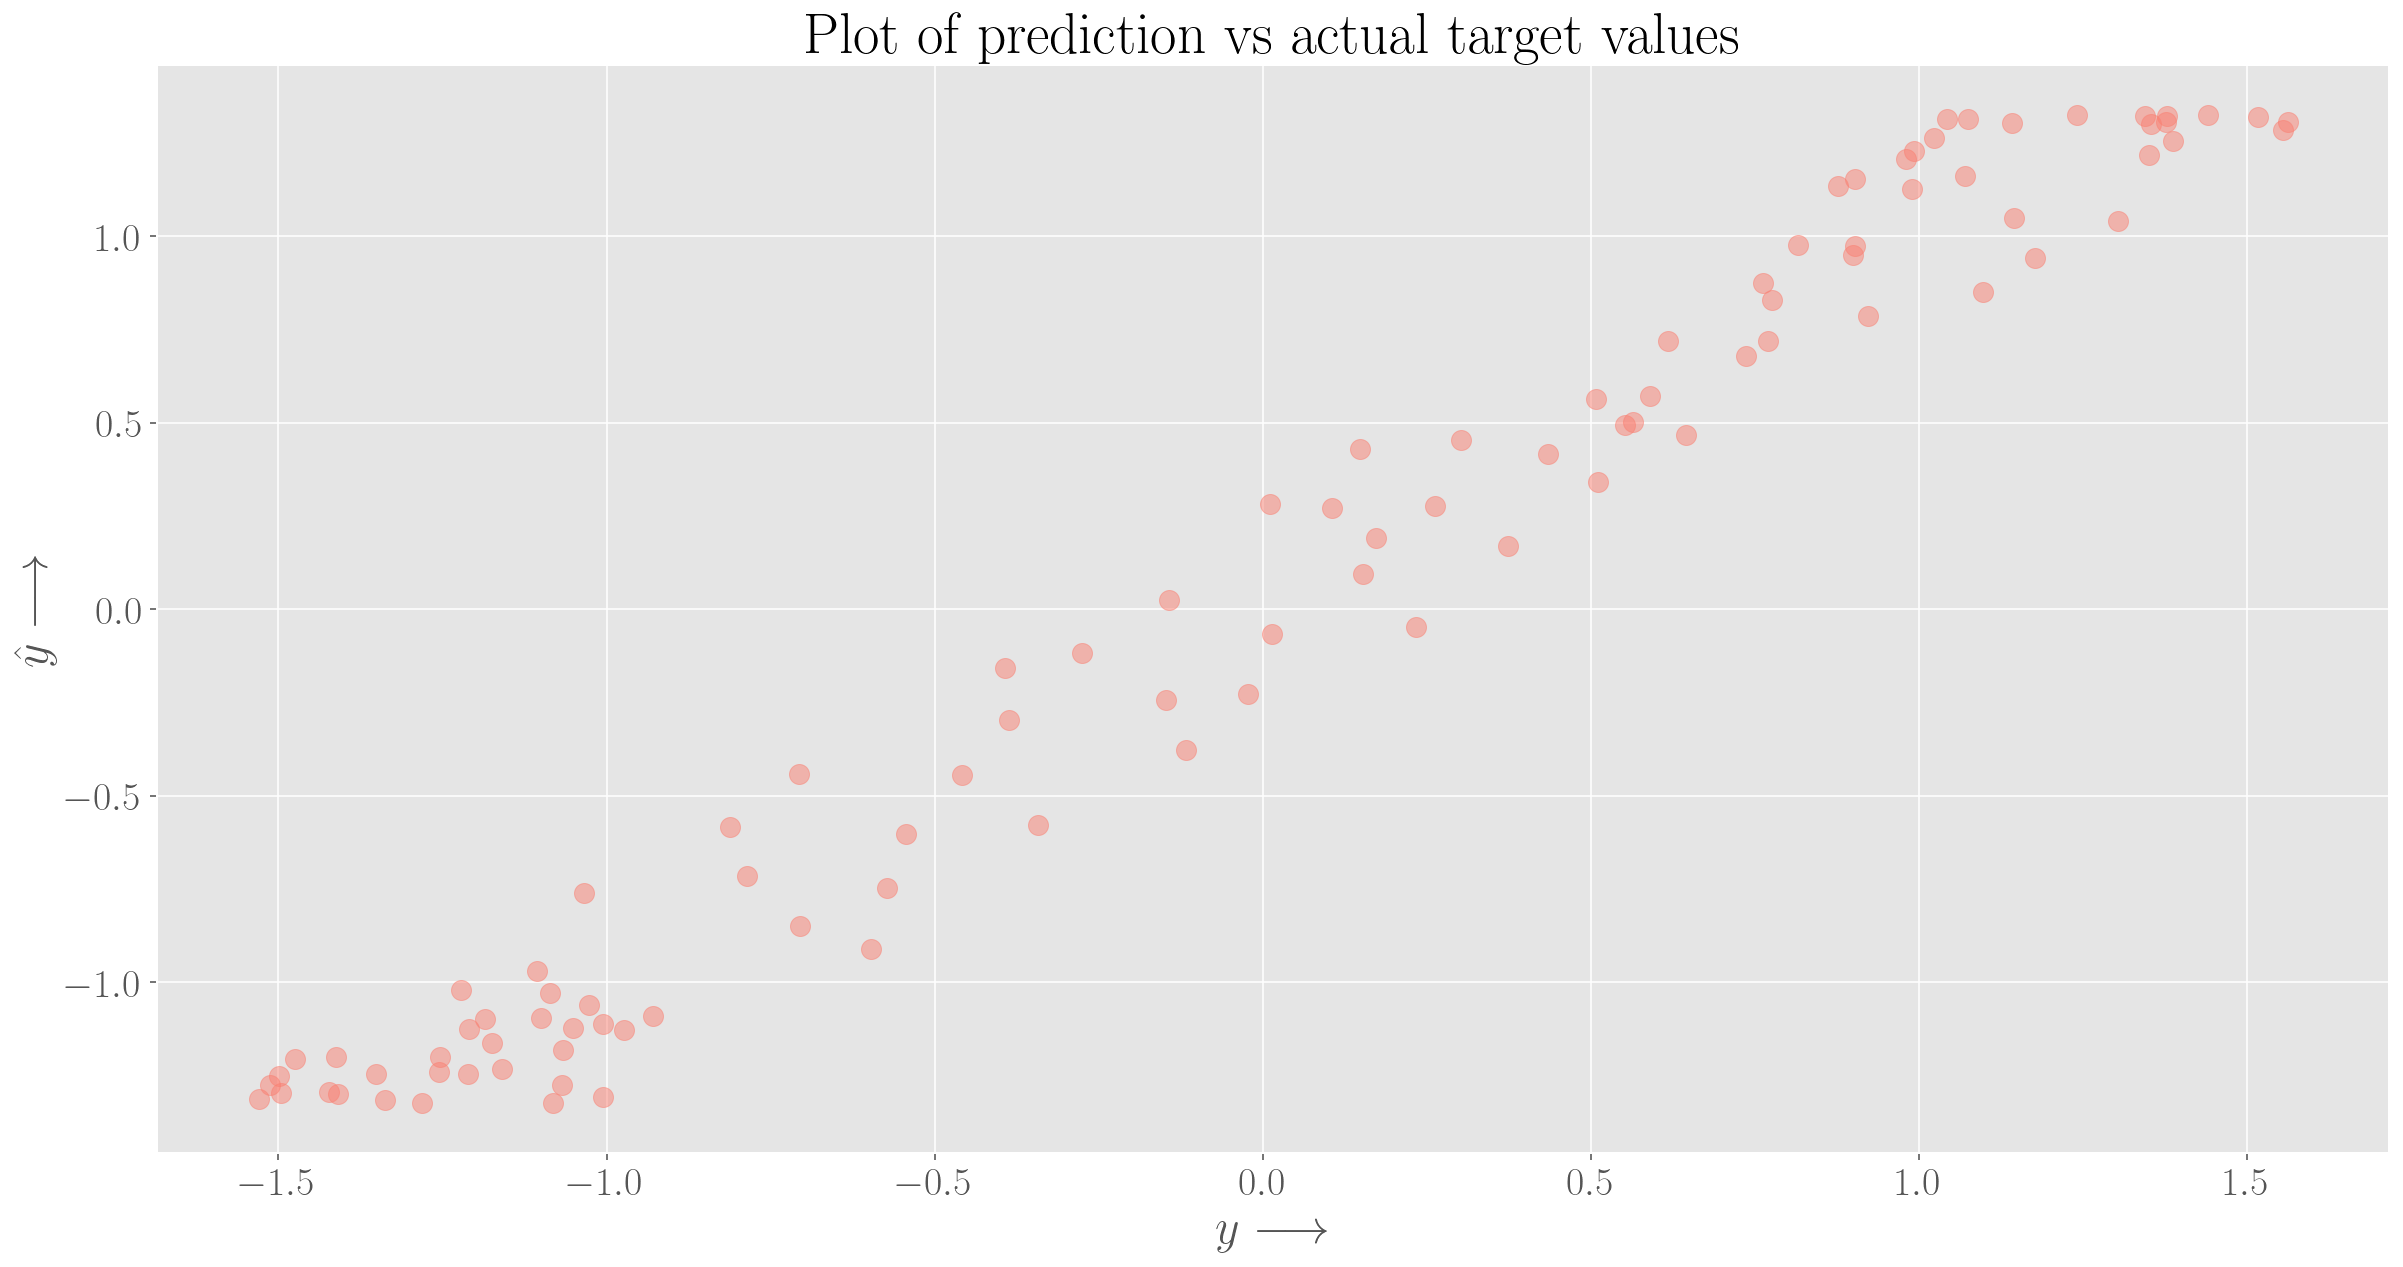

In [9]:
plt.scatter(y, ŷ, s=100, color='salmon', alpha=0.5);
plt.xlabel(r'$y\longrightarrow$');
plt.ylabel(r'$\hat y\longrightarrow$');
plt.title(r'Plot of prediction vs actual target values');

This is rather encouraging: there is a broad agreement between the prediction $\hat y$ and the actual $y$.

It is time now now for a residual plot:

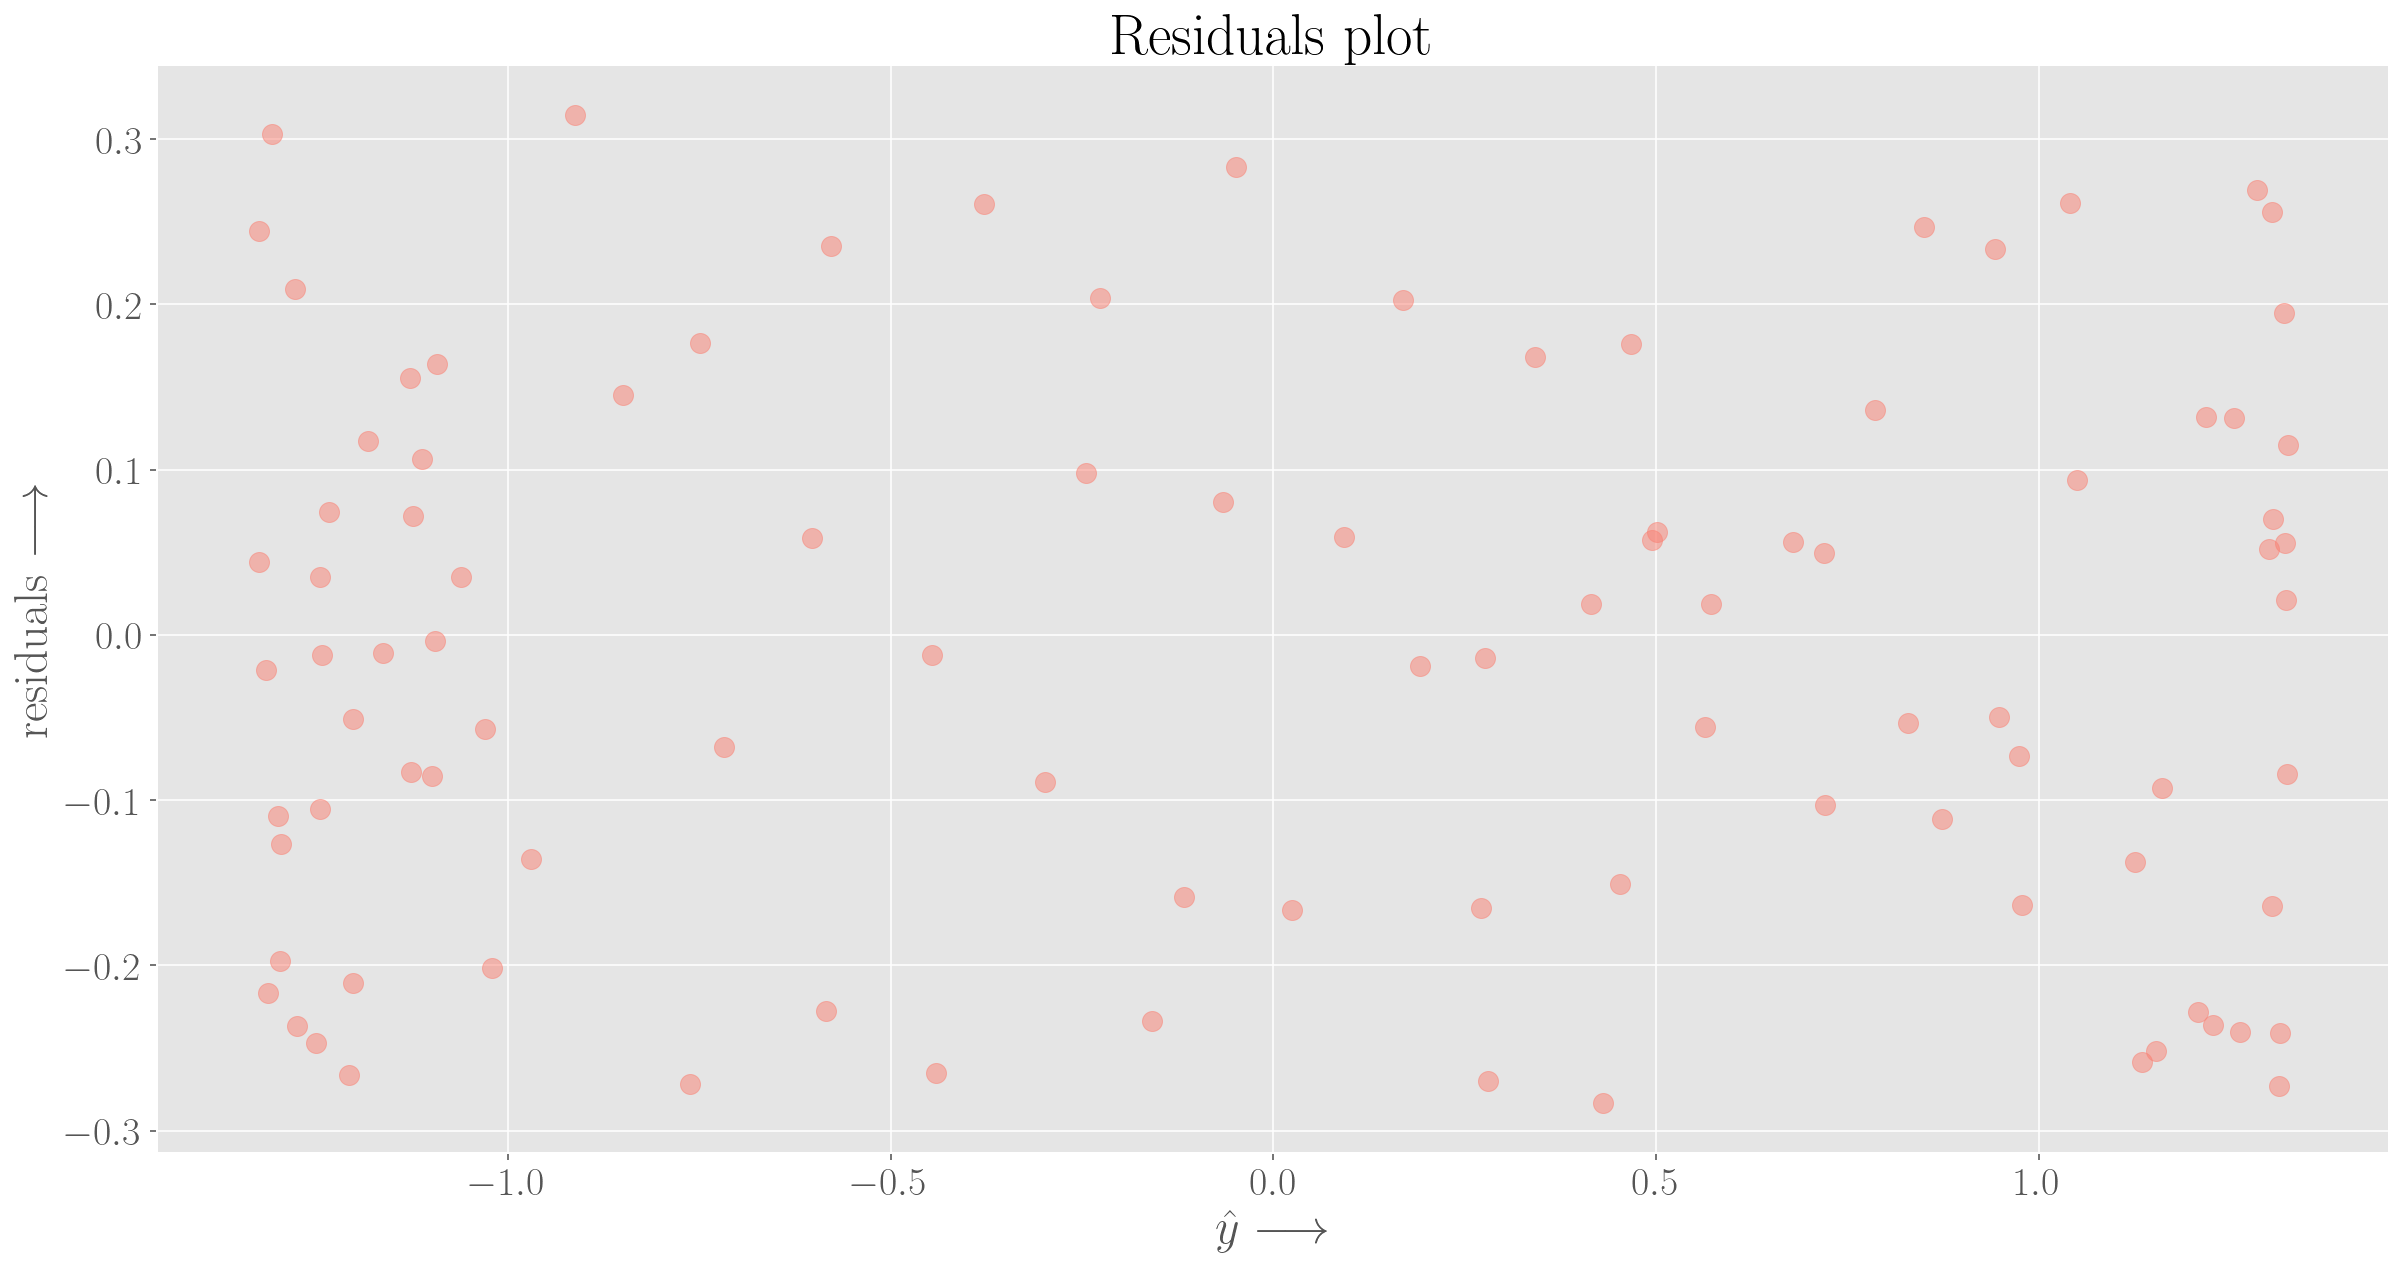

In [10]:
residuals = y - ŷ
plt.scatter(ŷ, residuals, s=100, color='salmon', alpha=0.5);
plt.xlabel(r'$\hat y\longrightarrow$');
plt.ylabel(r'residuals $\longrightarrow$');
plt.title(r'Residuals plot');

We do not observe any distinct patterns; the plot displays a fair degree of homoscedasticity. This too, therefore, is encouraging. As our customary final step of modeling analysis, let us continue on to plot the model prediction over the data.

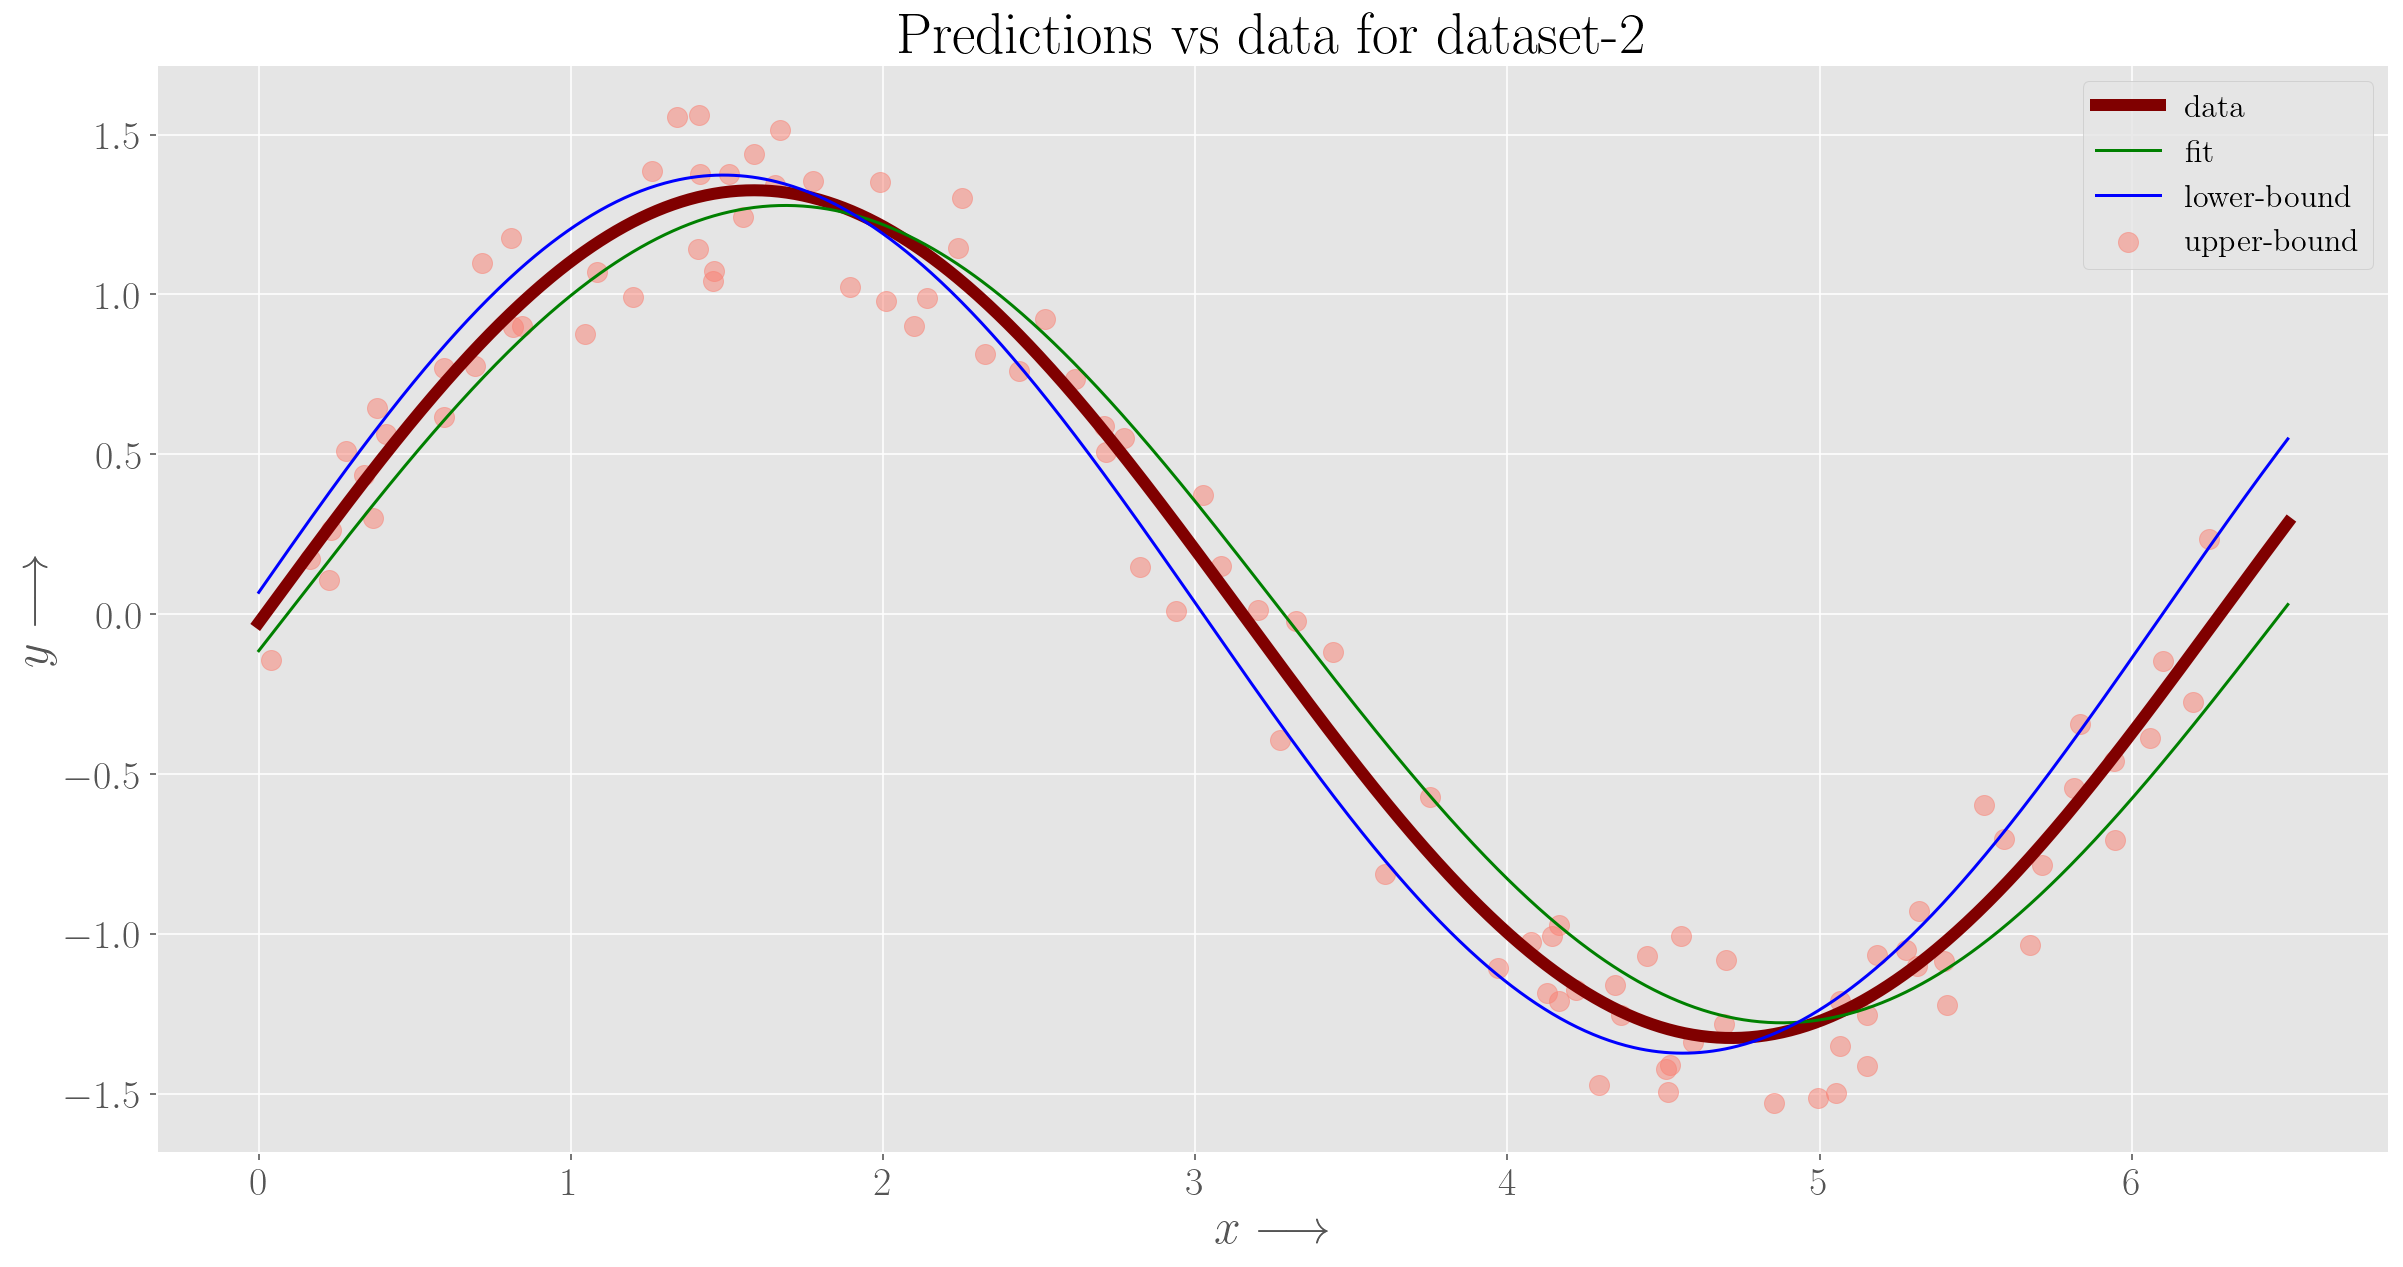

In [11]:
plt.scatter(data.x,y, s=100, color='salmon', alpha=0.5)
xfit = np.linspace(0,6.5, 1000)
yfit = sinewave(xfit, pars[0], pars[1], pars[2])
plt.plot(xfit,yfit,'maroon', linewidth=6);

lower = []
upper = []
for p,var in zip(pars, np.diag(pcov)):
  sigma = var**0.5
  lower.append(p - sigma*tval)
  upper.append(p + sigma*tval)

yfit = sinewave(xfit, *lower)
plt.plot(xfit,yfit, color='green', label='lower-bound');
yfit = sinewave(xfit, *upper)
plt.plot(xfit,yfit, color='blue', label='upper-bound');

plt.legend(['data','fit', 'lower-bound', 'upper-bound'],loc='best')
plt.xlabel(r'$x\longrightarrow$')
plt.ylabel(r'$y\longrightarrow$')
plt.title(r'Predictions vs data for  dataset-2 ');


# Dataset 3: The Bell-Curve

In a manner analogous to the prior analysis, let us now try to direct fit a parameteric model relying on a bell-curve-like hypothesis over dataset-3

$$ y = {A\over{\sqrt{2\pi\sigma^2}}}  \exp{- (x-\mu)^2\over{2\sigma^2} } $$
 
where  $A, \sigma \text{ and } \mu$ are the parameters of the model

In [12]:
data = pd.read_csv("https://raw.githubusercontent.com/supportvectors/ml-100/master/dataset-3.csv")
def bell_curve(x, A, μ, σ):
    """Nonlinear function in A, μ, σ to fit to data"""
    π = np.pi 
    factor_1 = A / np.sqrt(2*π*σ*σ)
    exponent = - ( (x - μ)*(x-μ))/ (2*σ*σ)
    return factor_1 * np.exp(exponent)
initial_guess = [1, 1, 1]
pars, pcov = curve_fit(bell_curve, 
                       data.x, 
                       data.y, 
                       p0=initial_guess)

# Print the results:
np.set_printoptions(precision=5, suppress=True)
print(" {:<5}= {}\n {:<5}= {}\n {:<5}= {}\n\n"
       .format('A', pars[0], 'μ', pars[1], 'σ', pars[2]))
print("The estimated parameter covariance matrix: \n{}"
      .format (pcov))

 A    = 0.9822808447917414
 μ    = 1.4229030332300248
 σ    = 1.7710348050063018


The estimated parameter covariance matrix: 
[[ 0.00013 -0.0001   0.00018]
 [-0.0001   0.00056 -0.00015]
 [ 0.00018 -0.00015  0.0006 ]]


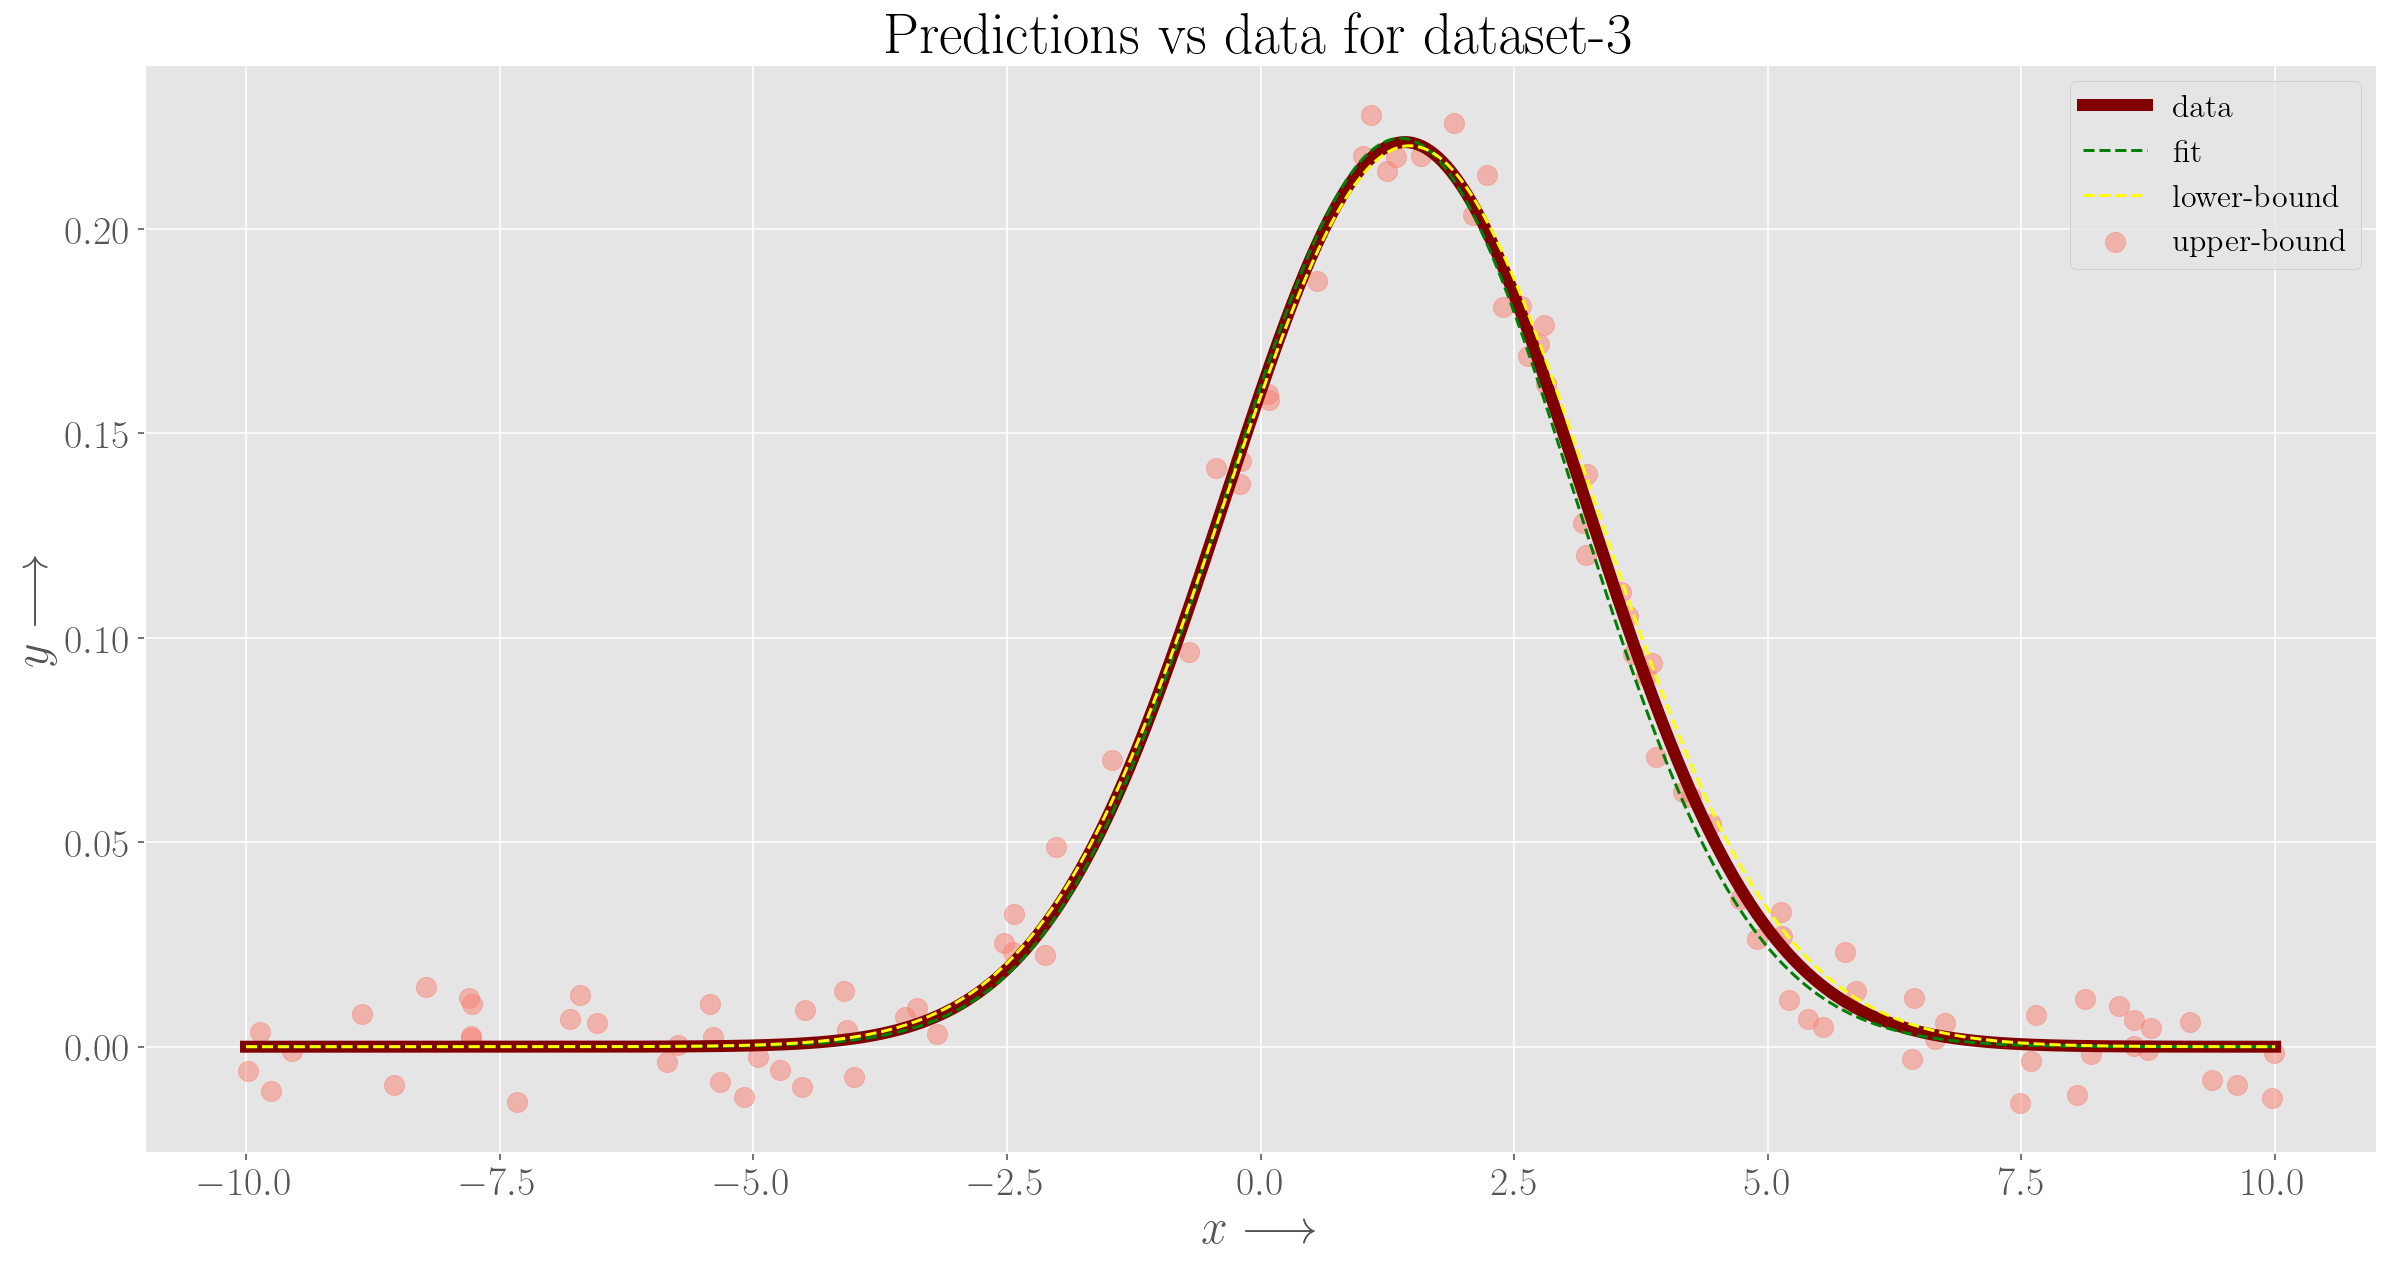

In [13]:
plt.scatter(data.x,data.y, s=100, color='salmon', alpha=0.5)
xfit = np.linspace(-10,10, 1000)
yfit = bell_curve(xfit, pars[0], pars[1], pars[2])
plt.plot(xfit,yfit,'maroon', linewidth=6)


lower = []
upper = []
for p,var in zip(pars, np.diag(pcov)):
  σ = var**0.5
  lower.append(p - σ*tval)
  upper.append(p + σ*tval)

yfit = bell_curve(xfit, *lower)
plt.plot(xfit,yfit,'--', color='green', label='lower-bound');
yfit = bell_curve(xfit, *upper)
plt.plot(xfit,yfit,'--', color='yellow', label='upper-bound');

plt.legend(['data','fit', 'lower-bound', 'upper-bound'],loc='best')
plt.xlabel(r'$x\longrightarrow$')
plt.ylabel(r'$y\longrightarrow$')
plt.title(r'Predictions vs data for  dataset-3 ');


In [14]:
ŷ = bell_curve(data.x, pars[0], pars[1], pars[2])
from scipy.stats.stats import pearsonr
pearsonr(data.y, ŷ)

(0.9941358181469927, 1.6073195815256364e-95)

# The Gamma Distribution Like Relationship

This is right-skewed curve, and one could think of a large number of mathematical functions that could produce it, such as Log-Normal, Poisson, Beta-distribution function, and so forth.

Let us first start with the hypothesis that it is gamma-distribution like function. A gamma-distribution is parameterized by two parameters: shape $\alpha$, and scale $\beta$. We will add a further parameter, $K$ for the $y$-value scaling.


(We leave the nonlinear least squares fit to functions like other distributions mentioned above as an exercise for the reader. See the homework at the end of this notebook.)

In [15]:

from scipy.stats import gamma
data = pd.read_csv("https://raw.githubusercontent.com/supportvectors/ml-100/master/dataset-5.csv")
def gammalike(input, K, α, β):
    """Nonlinear function in (K, α, β) to fit the data"""
    scale = 1
    x_ = input
    pdf = gamma(α, scale=β)
    value = K* pdf.pdf(x_)
    return value

initial_guess = [1, 1, 2]
pars, pcov = curve_fit(gammalike, 
                       data.x, 
                       data.y, 
                       p0=initial_guess)

# Print the results:
np.set_printoptions(precision=5, suppress=True)
print(" {:<5}= {}\n {:<5}= {}\n {:<5}= {}\n\n"
       .format('K', pars[0], 'α', pars[1], 'β', pars[2]))
print("The estimated parameter covariance matrix: \n{}"
      .format (pcov))

 K    = 10.000000000000004
 α    = 2.0
 β    = 2.0


The estimated parameter covariance matrix: 
[[ 0. -0.  0.]
 [-0.  0. -0.]
 [ 0. -0.  0.]]


In [16]:

yhat = gammalike(data.x, pars[0], pars[1], pars[2])
pc = np.corrcoef(data.y, yhat)
print ("The corr-matrix between y and yhat is: \n{}".format(pc))
print ("Thus the correlation is: {:<0.3f}%".format(100*pc[1,0]))


The corr-matrix between y and yhat is: 
[[1. 1.]
 [1. 1.]]
Thus the correlation is: 100.000%


The correlation is perfect! This is further evident in the scatterplot below, between the prediction $\hat y$ and $y$.

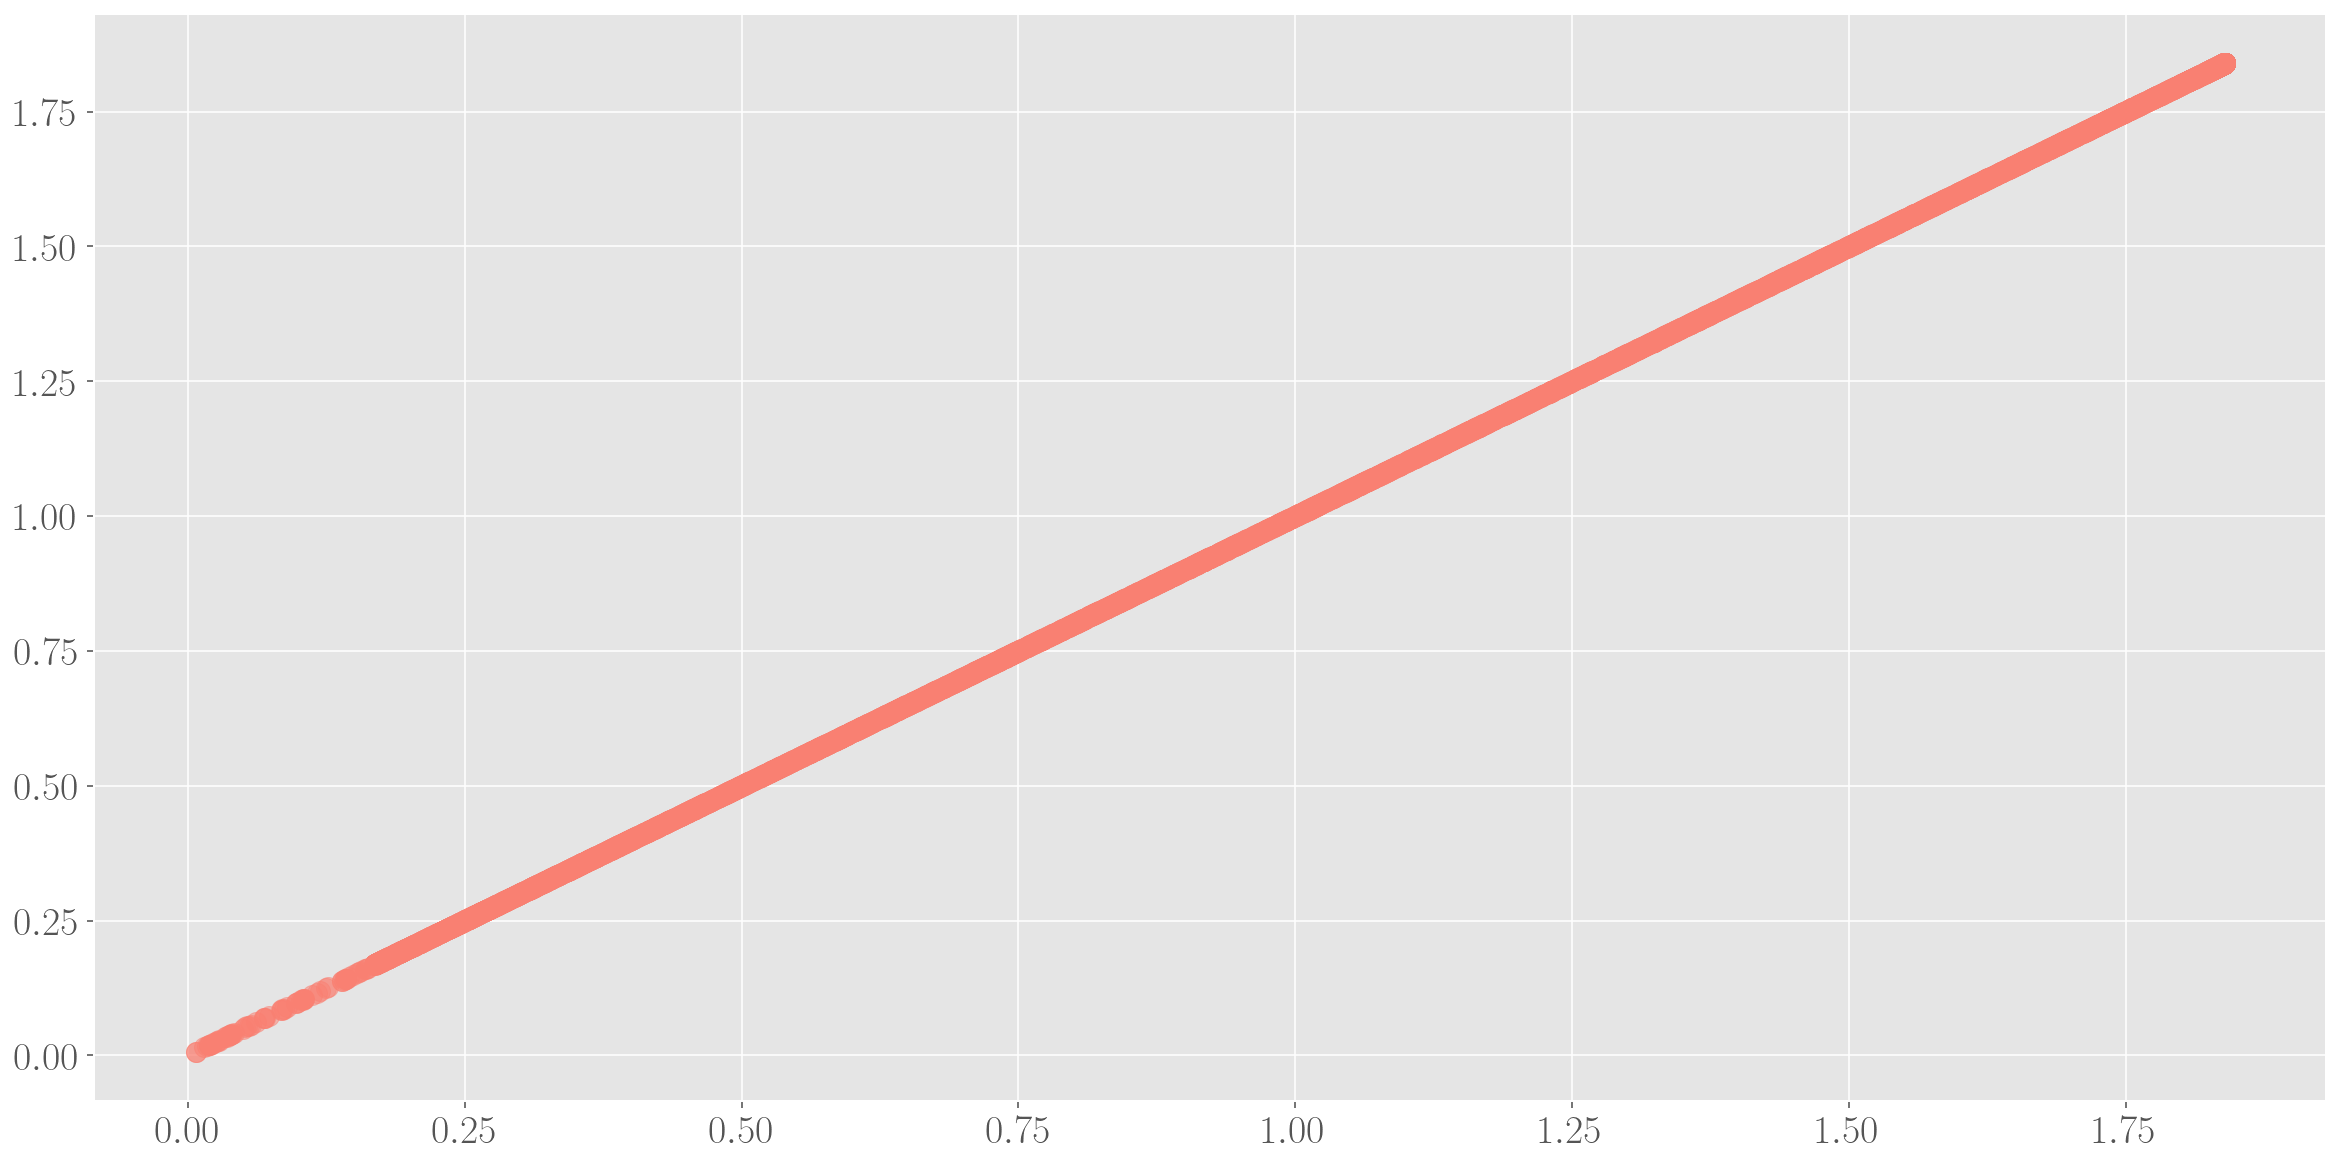

In [17]:
plt.scatter(data.y, yhat, s=100, alpha=0.5, color='salmon');

Finally, let us visualize the model predictions over the data.

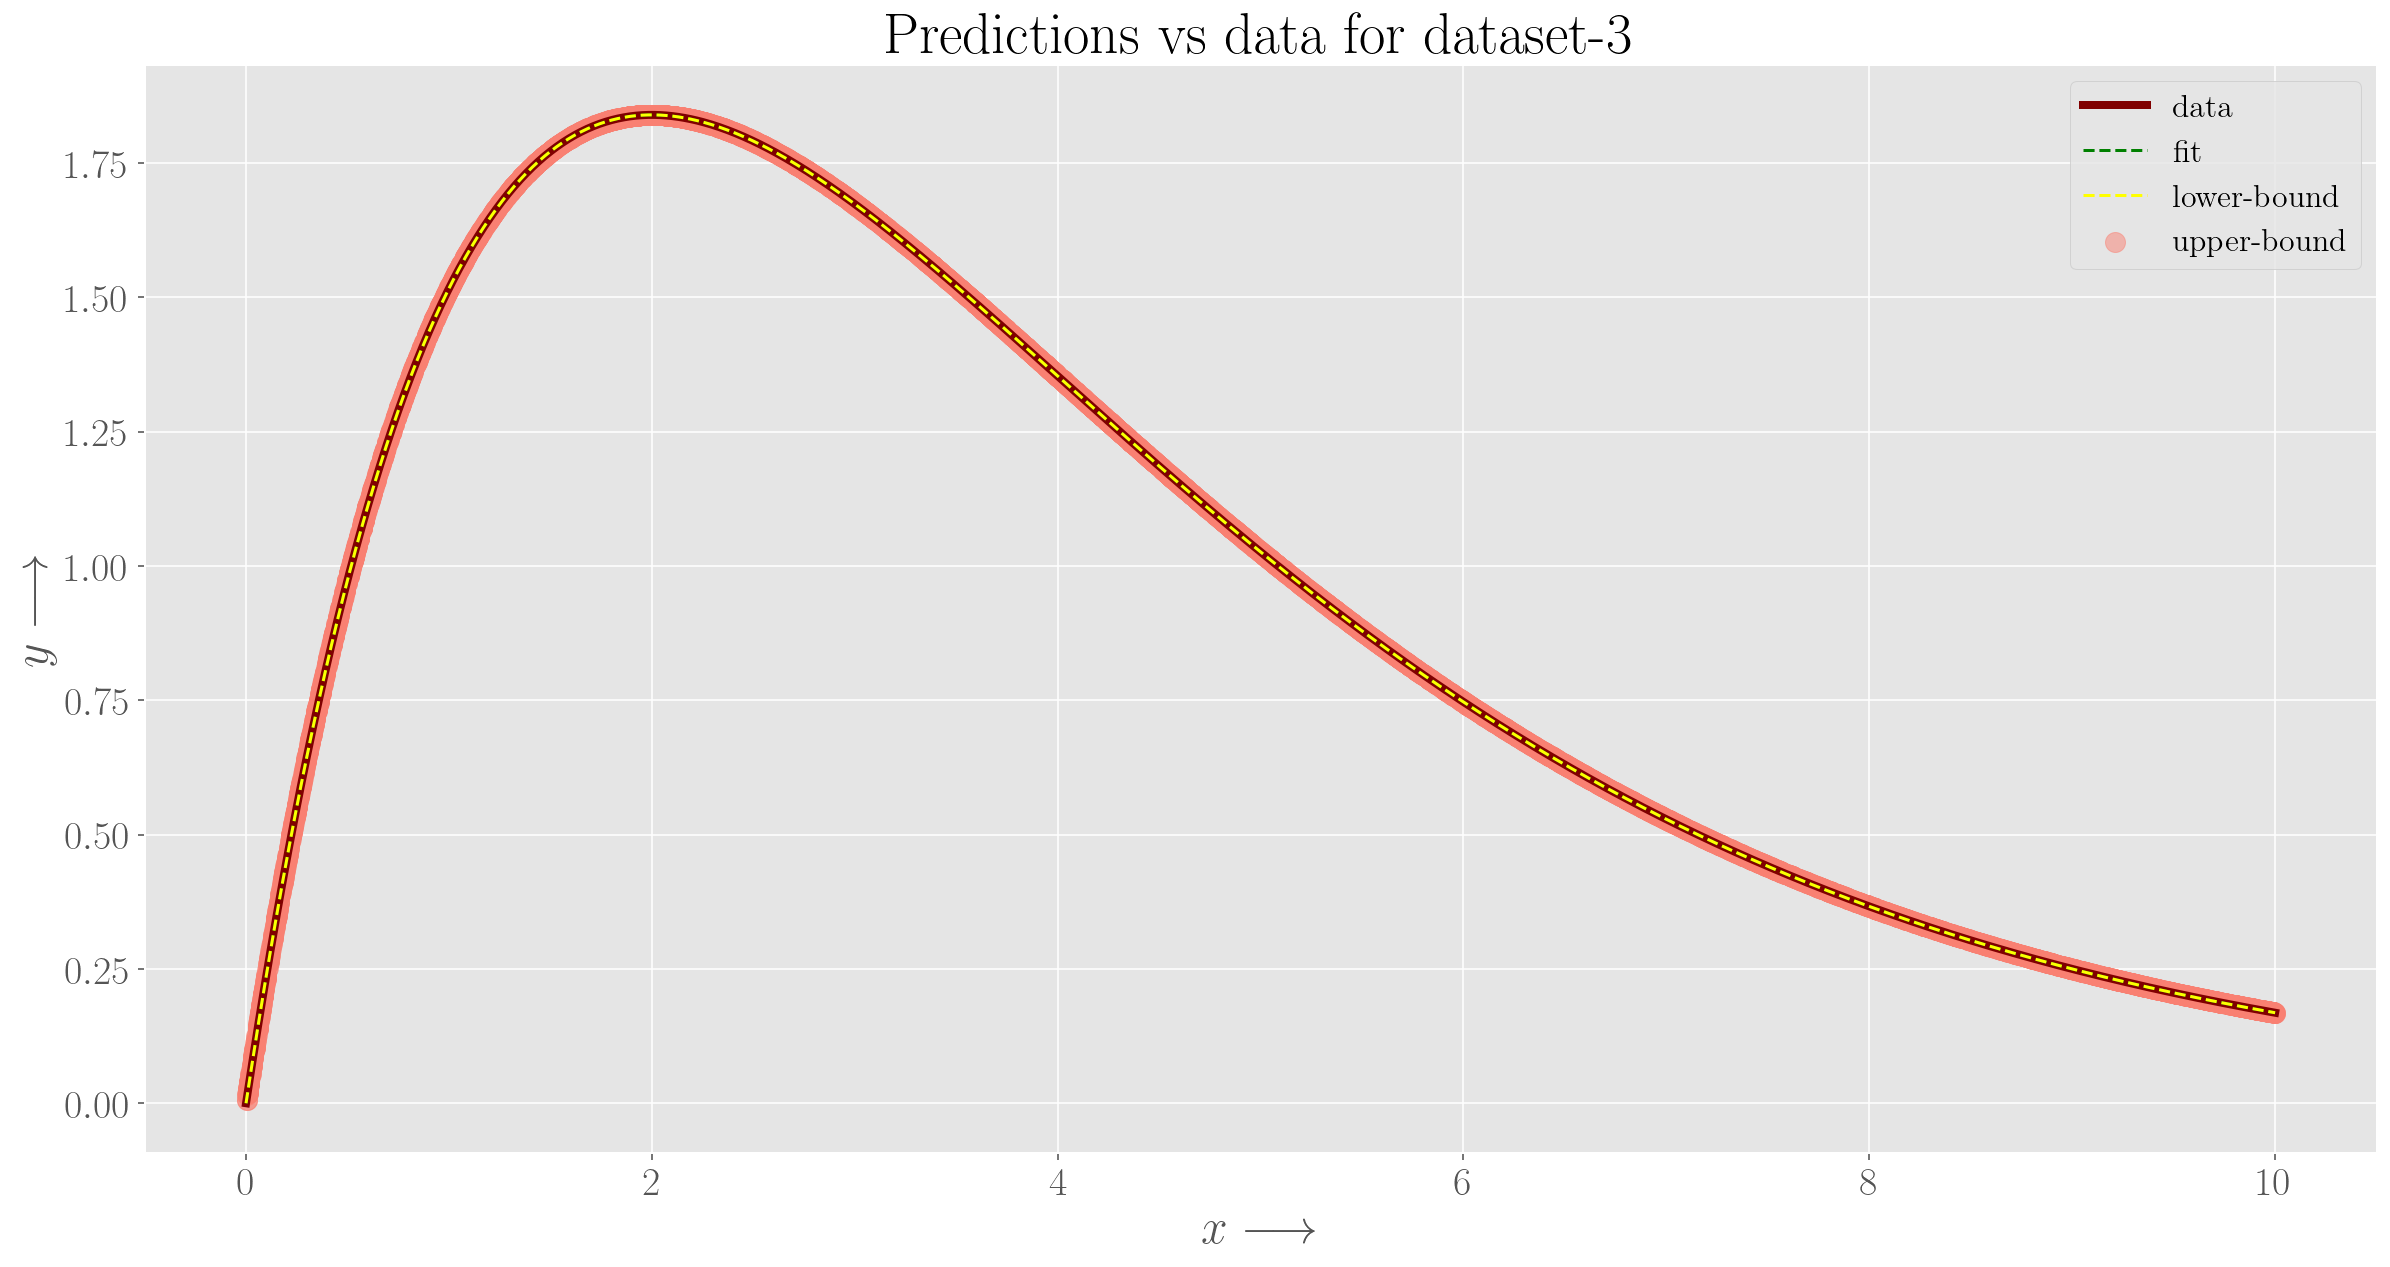

In [18]:
plt.scatter(data.x,data.y, s=100, color='salmon', alpha=0.5);
xfit = np.linspace(0,10, 1000)
yfit = gammalike(xfit, pars[0], pars[1], pars[2])
plt.plot(xfit,yfit,'maroon', linewidth=4);

lower = []
upper = []
for p,var in zip(pars, np.diag(pcov)):
  sigma = var**0.5
  lower.append(p - sigma*tval)
  upper.append(p + sigma*tval)

yfit = gammalike(xfit, *lower)
plt.plot(xfit,yfit,'--', color='green', label='lower-bound');
yfit = gammalike(xfit, *upper)
plt.plot(xfit,yfit,'--', color='yellow', label='upper-bound');



plt.legend(['data','fit', 'lower-bound', 'upper-bound'],loc='best')
plt.xlabel(r'$x\longrightarrow$')
plt.ylabel(r'$y\longrightarrow$')
plt.title(r'Predictions vs data for  dataset-3 ');

From all this, we conclude that we have arrived at a surprisingly accurate predictive model.

# Homework

The `dataset-5`, when visualized is reminiscent of many other transcendental functions. Therefore, repeat the exercise above with three different hypotheses:

## Log-Normal

Try fitting a log-normal function hypothesis to this dataset, and see how well it works.

## Beta-distribution like function

Another of the simpler hypotheses is to consider that it could be a beta-distribution like function. The form of this function therefore can be written, upto a proportionality constant, as:
    
$$   
\begin{equation}\label{eq:1}
y = K x^{a-1} (1-x)^{b-1}
\end{equation}
$$

## Poisson like

Finally, try to fit a Poisson distribution like function to this dataset, and see how well it works.

What do you infer from these exercises?

# Footnotes

[<sup id="fn1">1</sup>](#fn1-back)
In the famous historical problem of the Brachistochrone: https://www.cantorsparadise.com/the-famous-problem-of-the-brachistochrone-8b955d24bdf7